## 1. Background, the raw data files and their format

<p>While the rate of fatal road accidents has been decreasing steadily since the 80s, the past ten years have seen a stagnation in this reduction. Coupled with the increase in number of miles driven in the nation, the total number of traffic related-fatalities has now reached a ten year high and is rapidly increasing.</p>
<p>Per request of the US Department of Transportation, we are currently investigating how to derive a strategy to reduce the incidence of road accidents across the nation. By looking at the demographics of traﬃc accident victims for each US state, we find that there is a lot of variation between states. Now we want to understand if there are patterns in this variation in order to derive suggestions for a policy action plan. In particular, instead of implementing a costly nation-wide plan we want to focus on groups of  states with similar profiles.</p>
<p>The data was originally collected by the National Highway Traffic Safety Administration and the National Association of Insurance Commissioners. This particular dataset was compiled and released as a <a href="https://github.com/fivethirtyeight/data/tree/master/bad-drivers">CSV-file</a> </p>

In [1]:
# View the first 15 lines of datasets/road-accidents.csv
with open('datasets/road-accidents.csv') as f:
    for _ in range(15): # first 10 lines
        print(f.readline())

##### LICENSE #####

# This data set is modified from the original at fivethirtyeight (https://github.com/fivethirtyeight/data/tree/master/bad-drivers)

# and it is released under CC BY 4.0 (https://creativecommons.org/licenses/by/4.0/)

##### COLUMN ABBREVIATIONS #####

# drvr_fatl_col_bmiles = Number of drivers involved in fatal collisions per billion miles (2011)

# perc_fatl_speed = Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding (2009)

# perc_fatl_alcohol = Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired (2011)

# perc_fatl_1st_time = Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents (2011)

##### DATA BEGIN #####

state|drvr_fatl_col_bmiles|perc_fatl_speed|perc_fatl_alcohol|perc_fatl_1st_time

Alabama|18.8|39|30|80

Alaska|18.1|41|25|94

Arizona|18.6|35|28|96

Arkansas|22.4|18|26|95

California|12|35|28|89



## 2. Read in and get an overview of the data

In [2]:
# Import the `pandas` module as "pd"
import pandas as pd

# Read in `road-accidents.csv`
car_acc = pd.read_csv('datasets/road-accidents.csv', sep = '|', comment ='#')

# Save the number of rows columns as a tuple
rows_and_cols = car_acc.shape
print('There are {} rows and {} columns.\n'.format(rows_and_cols[0], rows_and_cols[1]))

# Generate an overview of the DataFrame
car_acc_information = car_acc.info()
print(car_acc_information)

# Display the last five rows of the DataFrame
car_acc.tail()

There are 51 rows and 5 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 51 non-null     object 
 1   drvr_fatl_col_bmiles  51 non-null     float64
 2   perc_fatl_speed       51 non-null     int64  
 3   perc_fatl_alcohol     51 non-null     int64  
 4   perc_fatl_1st_time    51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB
None


,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
46,Virginia,12.7,19,27,88
47,Washington,10.6,42,33,86
48,West Virginia,23.8,34,28,87
49,Wisconsin,13.8,36,33,84
50,Wyoming,17.4,42,32,90


## 3. Create a textual and a graphical summary of the data
<p> To further familiarize ourselves with this data, I will calculate summary statistics and produce a graphical overview of the data. I want to have an idea about the distribution of the variables within the data, and for that I will use a histogram. I  also want to explore the pairwise relationship between all columns in the data set by using a pairwise scatter plots.</p>

In [3]:
# import seaborn and make plots appear inline
import seaborn as sns

# Compute the summary statistics of all columns in the `car_acc` DataFrame
car_acc.describe()

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
count,51.000000,51.000000,51.000000,51.00000
mean,15.790196,31.725490,30.686275,88.72549
std,4.122002,9.633438,5.132213,6.96011
min,5.900000,13.000000,16.000000,76.00000
25%,12.750000,23.000000,28.000000,83.50000
50%,15.600000,34.000000,30.000000,88.00000
75%,18.500000,38.000000,33.000000,95.00000
max,23.900000,54.000000,44.000000,100.00000


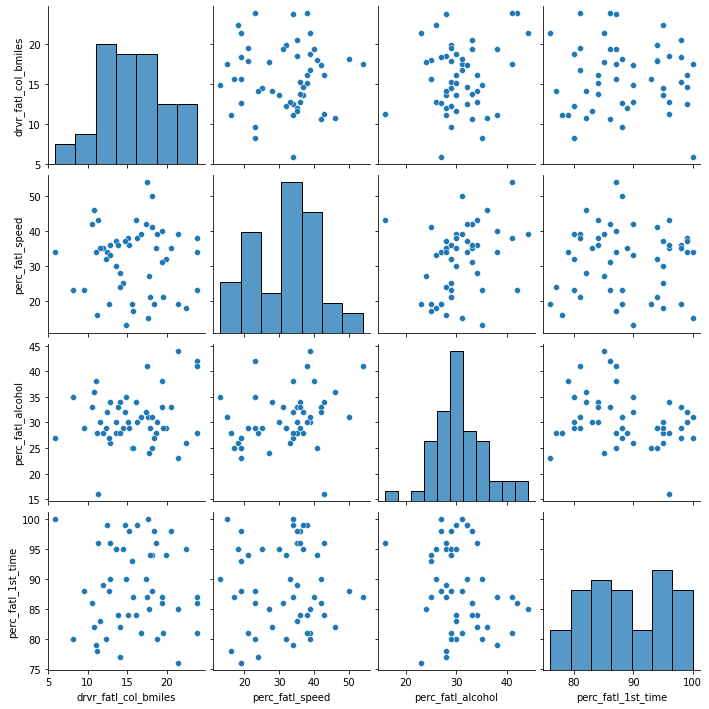

In [4]:
# Create a pairwise scatter plot to explore the data
sns.pairplot(car_acc)

## 4. Quantify the association of features and accidents
<p>We can already see some potentially interesting relationships between the target variable (the number of fatal accidents) and the feature variables (the remaining three columns).</p>
<p>To quantify the pairwise relationships that we observed in the scatter plots, we can compute the Pearson correlation coefficient matrix. The Pearson correlation coefficient is one of the most common methods to quantify correlation between variables, and by convention, the following thresholds are usually used:</p>
<ul>
<li>0.2 = weak</li>
<li>0.5 = medium</li>
<li>0.8 = strong</li>
<li>0.9 = very strong</li>
</ul>

In [5]:
# Compute the correlation coefficent for all column pairs
corr_columns = car_acc.corr()
corr_columns

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000


## 5. Fit a multivariate linear regression
<p>From the correlation table, we see that the amount of fatal accidents is most strongly correlated with alcohol consumption (first row). But in addition, we also see that some of the features are correlated with each other, for instance, speeding and alcohol consumption are positively correlated. I, therefore, want to compute the association of the target with each feature while adjusting for the effect of the remaining features. This can be done using multivariate linear regression.</p>

In [6]:
# Import the linear model function from sklearn
from sklearn import linear_model

# Create the features and target DataFrames
features = car_acc.drop(labels =['state', 'drvr_fatl_col_bmiles'], axis = 1)
target = car_acc['drvr_fatl_col_bmiles']

# Create a linear regression object
reg = linear_model.LinearRegression()

# Fit a multivariate linear regression model
reg.fit(features, target)

# Retrieve the regression coefficients
fit_coef = reg.coef_
fit_coef

array([-0.04180041,  0.19086404,  0.02473301])

## 6. Perform PCA on standardized data
<p>The regression coefficients confirm us that alcohol consumption is weakly associated with the number of fatal accidents across states. This could lead us to conclude that alcohol consumption should be a focus for further investigations and maybe strategies should divide states into high versus low alcohol consumption in accidents. But there are also associations between  alcohol consumptions and the other two features, so it might be worth trying to split the states in a way that accounts for all three features.</p>
<p>One way of clustering the data is to use PCA to visualize data in reduced dimensional space where we can try to pick up patterns by eye. PCA uses the absolute variance to calculate the overall variance explained for each principal component, so it is important that the features are on a similar scale (unless we would have a particular reason that one feature should be weighted more).</p>
<p>I'll use the appropriate scaling function to standardize the features to be centered with mean 0 and scaled with standard deviation 1.</p>

The cumulative variance of the first two principal components is 0.7947


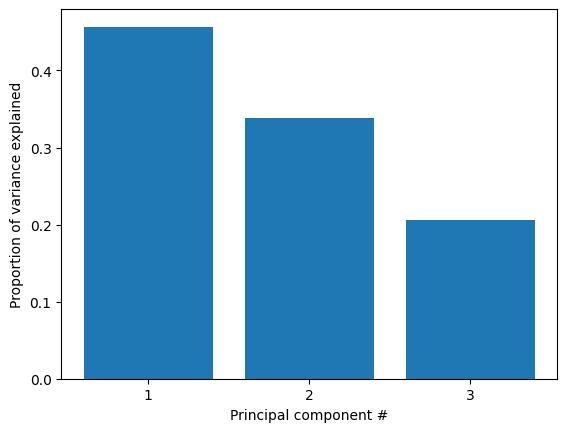

In [7]:
# Standardize and center the feature columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
 
# Import the PCA class function from sklearn
from sklearn.decomposition import PCA
pca = PCA()

# Fit the standardized data to the pca
pca.fit(features_scaled )

# Plot the proportion of variance explained on the y-axis of the bar plot
import matplotlib.pyplot as plt
plt.bar(range(1, pca.n_components_ + 1),  pca.explained_variance_ratio_)
plt.xlabel('Principal component #')
plt.ylabel('Proportion of variance explained')
plt.xticks([1, 2, 3])

# Compute the cumulative proportion of variance explained by the first two principal components
two_first_comp_var_exp = pca.explained_variance_ratio_.cumsum()[1]
print("The cumulative variance of the first two principal components is {}".format(round(two_first_comp_var_exp, 5)))

## 7. Visualize the first two principal components
<p>The first two principal components enable visualization of the data in two dimensions while capturing a high proportion of the variation (79%) from all three features: speeding, alcohol influence, and first-time accidents. This enables us to use our eyes to try to discern patterns in the data with the goal to find groups of similar states.</p>
<p>I will create a scatter plot of the first principle components and explore how the states cluster together in this visualization.</p>

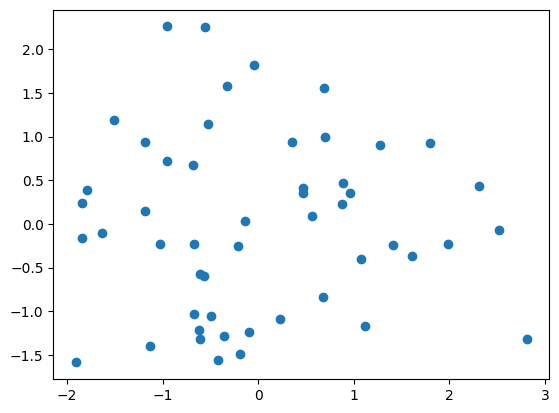

In [8]:
# Transform the scaled features using two principal components
pca = PCA(n_components = 2)
p_comps = pca.fit_transform(features_scaled)

# Extract the first and second component to use for the scatter plot
p_comp1 = p_comps[:, 0]
p_comp2 = p_comps[:, 1]

# Plot the first two principal components in a scatter plot
plt.scatter(p_comp1, p_comp2)
plt.show()

## 8. Find clusters of similar states in the data
<p>It was not entirely clear from the PCA scatter plot how many groups in which the states cluster. To identify a reasonable number of clusters, I will use KMeans clustering by creating a scree plot and finding the "elbow" to determine the optimal number of clusters for a given data set.</p>

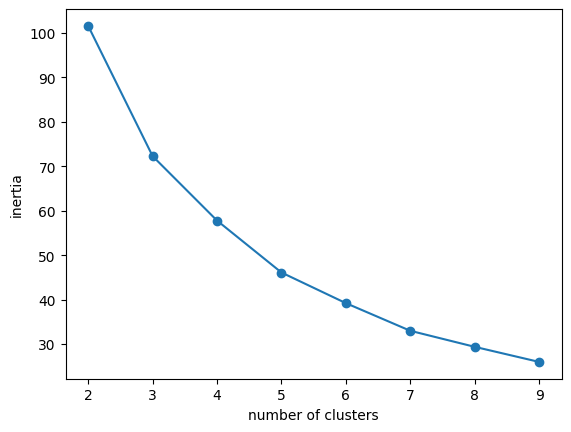

In [9]:
# Import KMeans from sklearn
from sklearn.cluster import KMeans

# A loop will be used to plot the explanatory power for up to 10 KMeans clusters
ks = range(2, 10)
inertias = []

for k in ks:
    # Initialize the KMeans object using the current number of clusters (k)
    km = KMeans(n_clusters=k, random_state=8)
    # Fit the scaled features to the KMeans object
    km.fit(features_scaled)
    # Append the inertia for `km` to the list of inertias
    inertias.append(km.inertia_)
    
# Plot the results in a line plot
plt.plot(ks, inertias, marker='o')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()

<p> Since there wasn't a clear elbow in the scree plot, I will  use SilhouetteVisualizern to select  a value for K by comparing multiple visualizers plots.  In SilhouetteVisualizer plots, clusters with higher scores have wider silhouettes, but clusters that are less cohesive will fall short of the average score across all clusters, which is plotted as a vertical dotted red line. <p>

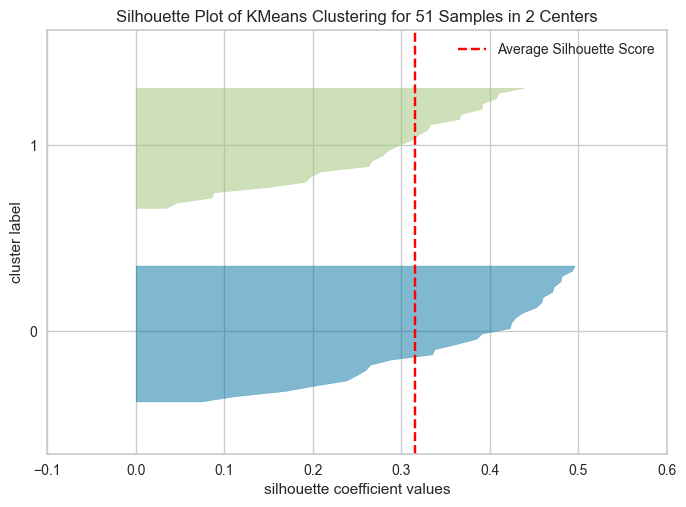

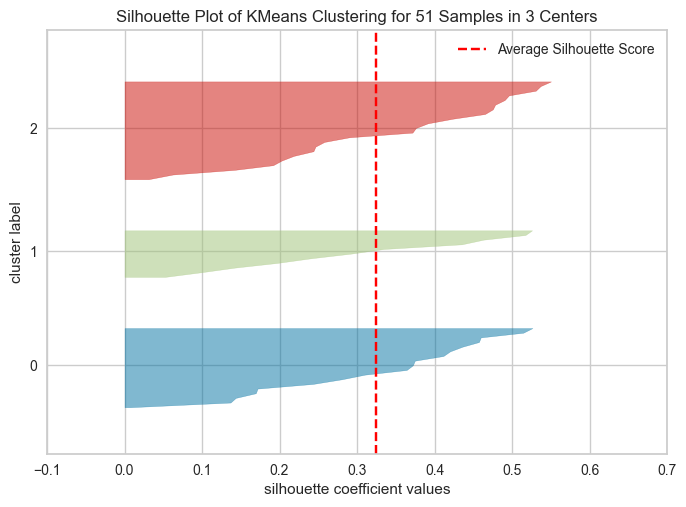

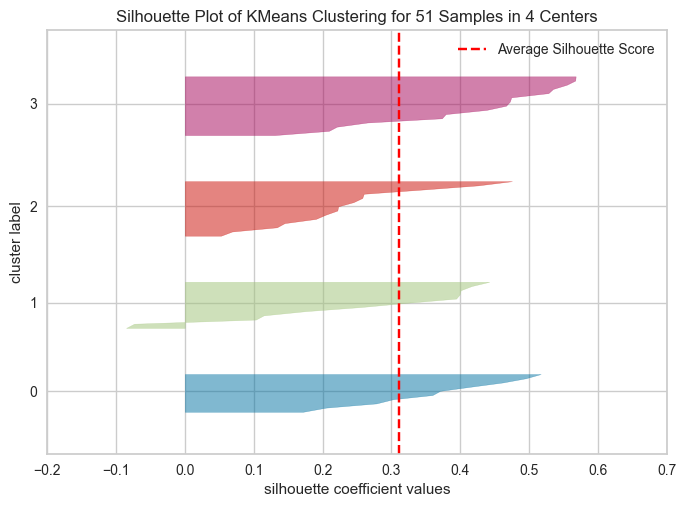

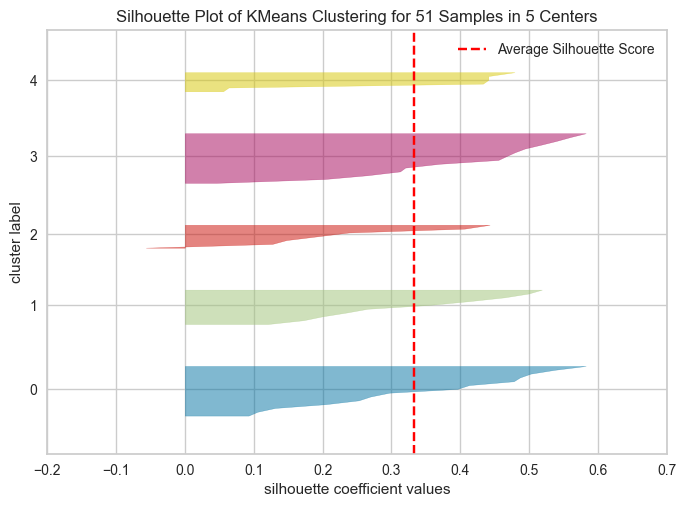

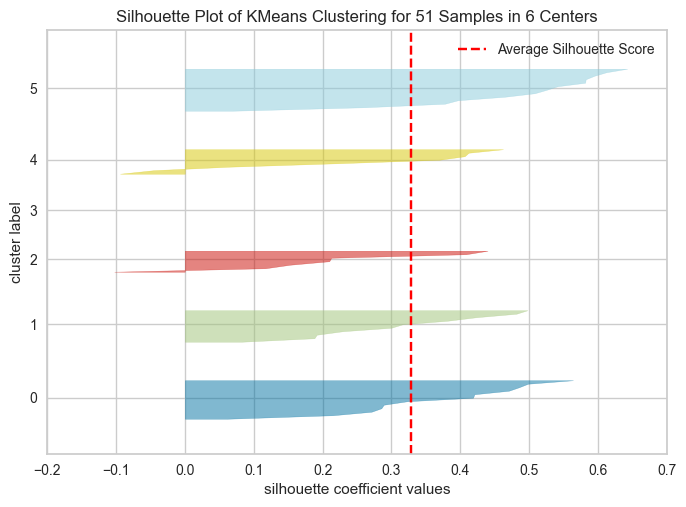

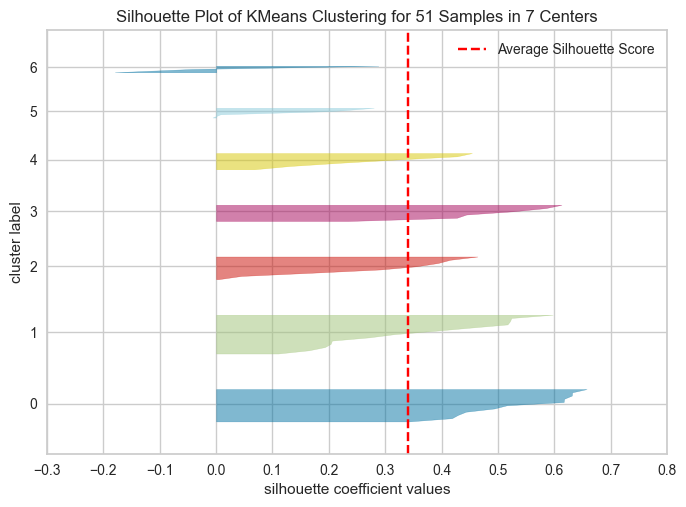

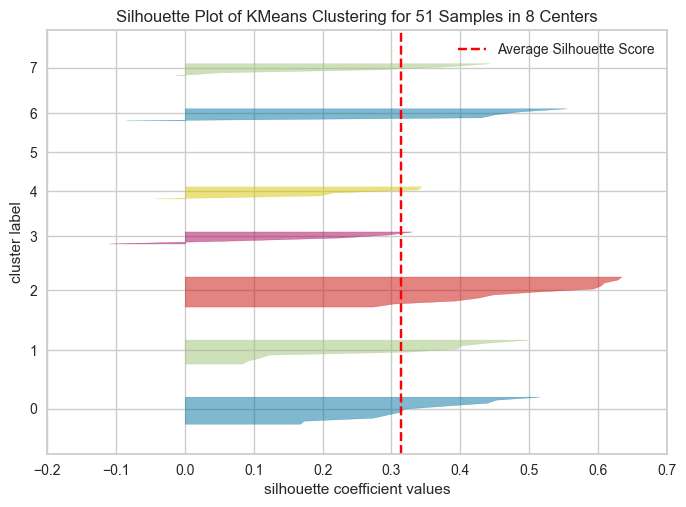

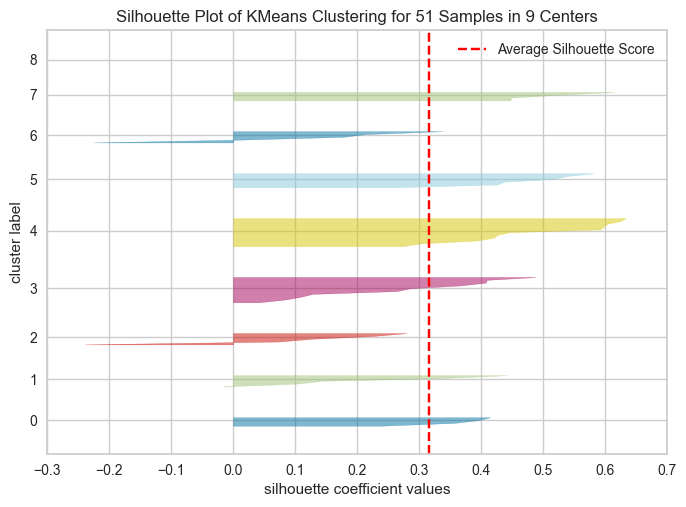

In [10]:
from yellowbrick.cluster import  SilhouetteVisualizer
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, random_state=42)
    
    # Fit model to samples
    model.fit(features_scaled)

    sil_visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    sil_visualizer.fit(features_scaled)
    sil_visualizer.show()

## 9. KMeans to visualize clusters in a scatter plot
<p>SilhouetteVisualizer show us that assigning the states to either two or three clusters is a reasonable choice, and I will resume my analysis using three clusters. Let's see how the KMeans scatter plot looks if we color the states according to the cluster to which they are assigned.</p>

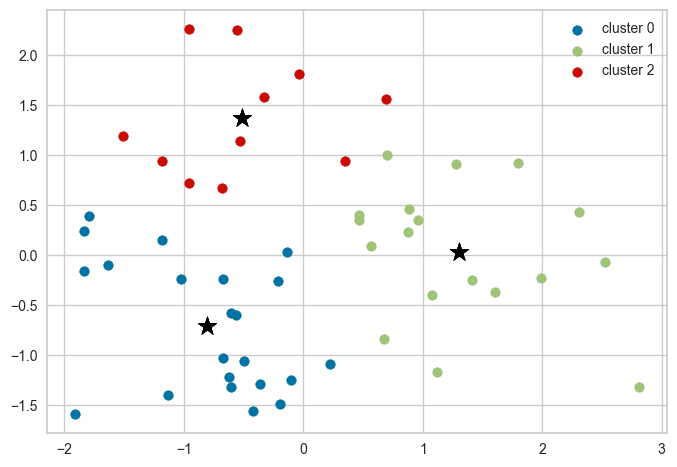

In [11]:
# Create a KMeans object with 3 clusters
km = KMeans(n_clusters = 3, random_state= 8)

# Fit the data to the `km` object
km.fit(p_comps)

# Get the cluster centroids
centroids = km.cluster_centers_

import numpy as np
# Scatter plot, coloring by variety_numbers
for cluster_label in np.unique(km.labels_):
    idx_label = np.where(km.labels_==cluster_label)
    pc1 = p_comps[idx_label,0]
    pc2 = p_comps[idx_label,1]
    plt.scatter(pc1, pc2, label=f"cluster {cluster_label}")
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='black')

plt.legend()
plt.show()

## 10. Visualize the feature differences between the clusters
<p>The information we have used to cluster the states into three distinct groups are the percentage of drivers speeding, under alcohol influence and that has not previously been involved in an accident. I will use these clusters to visualize how  the three clusters are different in terms of the three features that we used for clustering. I will use the unscaled features to facilitate the interpretation of the differences.</p>

In [12]:
# Create a new column with the labels from the KMeans clustering
car_acc['cluster'] =km.labels_
car_acc.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,cluster
0,Alabama,18.8,39,30,80,1
1,Alaska,18.1,41,25,94,0
2,Arizona,18.6,35,28,96,0
3,Arkansas,22.4,18,26,95,0
4,California,12.0,35,28,89,0


In [13]:
features.columns

Index(['perc_fatl_speed', 'perc_fatl_alcohol', 'perc_fatl_1st_time'], dtype='object')

In [14]:
# Reshape the DataFrame to the long format
melt_car = pd.melt(car_acc, id_vars = 'cluster', var_name = 'measurement', value_vars = features.columns, value_name = 'percent')
melt_car.sample(5)

,cluster,measurement,percent
116,0,perc_fatl_1st_time,95
73,2,perc_fatl_alcohol,28
109,0,perc_fatl_1st_time,99
49,1,perc_fatl_speed,36
147,0,perc_fatl_1st_time,95


<AxesSubplot:xlabel='percent', ylabel='measurement'>

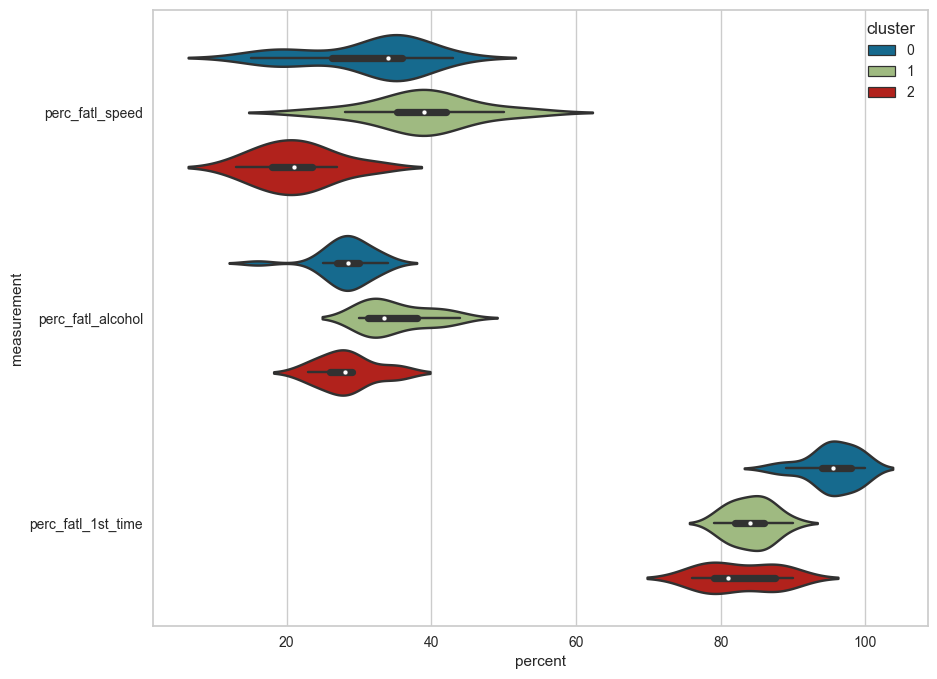

In [15]:
# Create a violin plot splitting and coloring the results according to the km-clusters
plt.figure(figsize =(10, 8))
sns.violinplot(y='measurement', x ='percent', data=melt_car, hue = 'cluster')

## 11. Compute the number of accidents within each cluster
<p>Now it is clear that different groups of states may require different interventions. Since resources and time are limited, it is useful to start off with an intervention in one of the three groups first. Now I will include data on how many miles are driven in each state, because this will help me to compute the total number of fatal accidents in each state. Data on miles driven is available in another tab-delimited text file. I will assign this new information to a column in the DataFrame and create a bar plot for how many total fatal traffic accidents there are within each state cluster.</p>

In [16]:
# Read in the new dataset
miles_driven = pd.read_csv('datasets/miles-driven.csv', sep='|')

# Merge the `car_acc` DataFrame with the `miles_driven` DataFrame
car_acc_miles = car_acc.merge(miles_driven, on ='state')

# Create a new column for the number of drivers involved in fatal accidents
car_acc_miles['num_drvr_fatal_col'] = car_acc_miles['million_miles_annually']*car_acc_miles['drvr_fatl_col_bmiles']/1000
car_acc_miles.head(3)

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,cluster,million_miles_annually,num_drvr_fatal_col
0,Alabama,18.8,39,30,80,1,64914,1220.3832
1,Alaska,18.1,41,25,94,0,4593,83.1333
2,Arizona,18.6,35,28,96,0,59575,1108.0950


         count        mean         sum
cluster                               
0           22  898.378595  19764.3291
1           18  911.406439  16405.3159
2           11  860.505945   9465.5654


<AxesSubplot:xlabel='cluster', ylabel='num_drvr_fatal_col'>

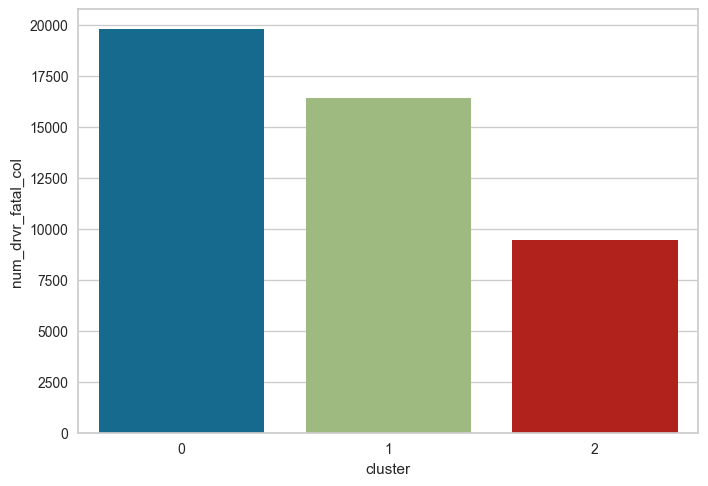

In [17]:
# Calculate the number of states in each cluster and their 'num_drvr_fatl_col' mean and sum.
count_mean_sum = car_acc_miles.groupby('cluster')['num_drvr_fatal_col'].agg(['count', 'mean', 'sum'])
print(count_mean_sum)

# Create a barplot of the total number of accidents per cluster
sns.barplot(x='cluster', y='num_drvr_fatal_col', data=car_acc_miles, estimator=sum, ci=None)

## 12. The mean values of each feature for each cluster
 I will use now the average grouped by cluster method to interprete the KMeans clusters. In this method, the average values of the features for each cluster are calculated by grouping the data points based on their cluster labels.

In [18]:
# Create a new datafarme only with this features:'cluster','perc_fatl_speed', 'perc_fatl_alcohol',
                                               # 'perc_fatl_1st_time', and 'num_drvr_fatl_col'
car_acc_miles_interp = car_acc_miles[['cluster','perc_fatl_speed', 'perc_fatl_alcohol',
       'perc_fatl_1st_time', 'num_drvr_fatal_col']].set_index('cluster')
car_acc_miles_interp.sample(3)

,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,num_drvr_fatal_col
cluster,,,,
1,38,30,84,215.1448
2,19,23,76,1028.5054
0,18,26,95,738.1472


In [19]:
# Group the data by the predicted cluster
cluster_group = car_acc_miles_interp.groupby(['cluster'])

# Calculate the mean of each feature for each cluster
cluster_mean = cluster_group.mean()

# Define a color map
color_map = sns.cubehelix_palette(as_cmap=True)

cluster_mean.style.background_gradient(cmap=color_map, subset=list(cluster_mean.columns))

,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,num_drvr_fatal_col
cluster,,,,
0,31.227273,28.272727,95.454545,898.378595
1,38.722222,35.055556,84.166667,911.406439
2,21.272727,28.363636,82.727273,860.505945


By comparing the average values, we see that:
- **Cluster 0** has the largest percentage of drivers involved in fatal collisions who had not been involved in any previous accidents;
- **Cluster 1** has the largest total number of accidents, the largest percentage of drivers involved in fatal collisions who were speeding, and the largest percentage of drivers involved in fatal collisions alcohol-impaired;
- **Cluster 2** has smallest values for all four features - 'perc_fatl_speed', 'perc_fatl_alcohol', 'perc_fatl_1st_time','num_drvr_fatl_col'. 

After examining the results, it is apparent that there is no clear-cut answer when it comes to identifying the most significant cluster. However, we can still make a compelling case for a specific cluster and support our reasoning with the data that we have gathered. In my opinion, the best course of action would be for the policy to prioritize intervention efforts and conduct more in-depth analysis on cluster 1.